In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt # 시각화 library
import numpy as np

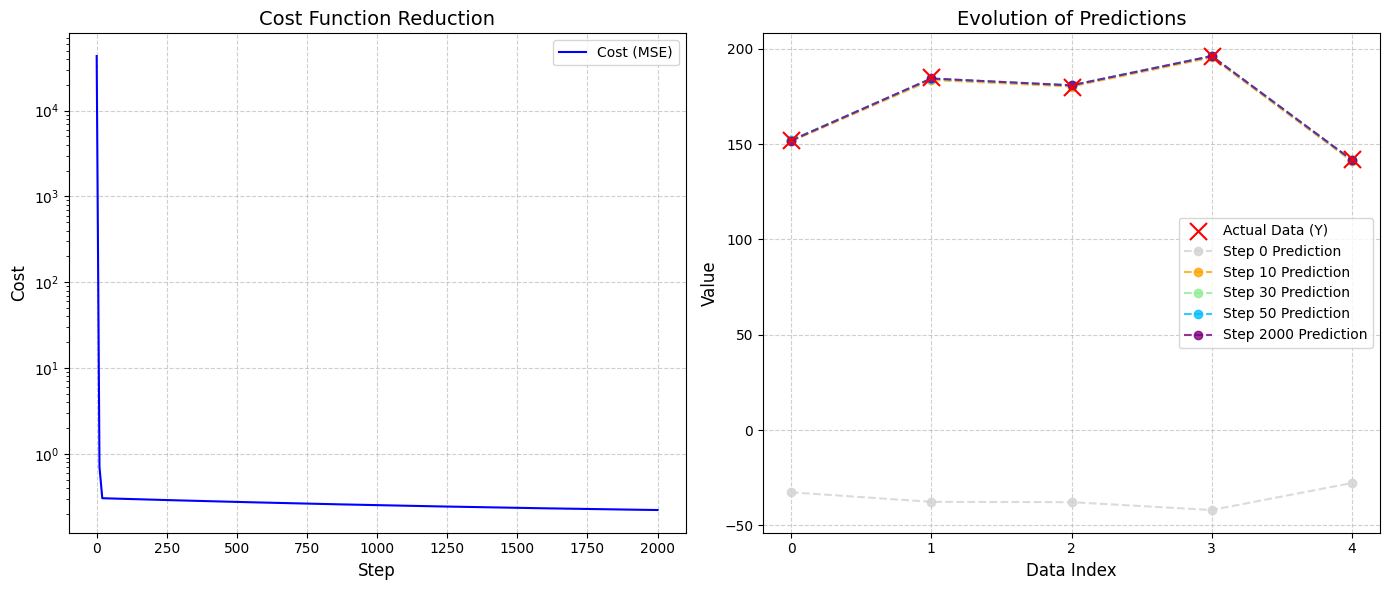

In [ ]:
# 시각화를 위한 기록용 리스트
steps_hist = []
cost_hist = []
preds_at_steps = [] # 특정 시점의 예측값을 저장

# -----------------------------
# 1. Data
# -----------------------------
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

# -----------------------------
# 2. Variables (weights and bias)
# -----------------------------
w1 = tf.Variable(tf.random.normal([1]), name='weight1')
w2 = tf.Variable(tf.random.normal([1]), name='weight2')
w3 = tf.Variable(tf.random.normal([1]), name='weight3')
b = tf.Variable(tf.random.normal([1]), name='bias')

# -----------------------------
# 3. Hypothesis
# -----------------------------
def hypothesis():
    return x1_data * w1 + x2_data * w2 + x3_data * w3 + b  # Matrix 곱

# -----------------------------
# 4. Cost function (MSE: Mean Square Error)
# -----------------------------
def cost_fn(hy_val, y_true):
    return tf.reduce_mean(tf.square(hy_val - y_true))

# -----------------------------
# 5. Optimizer
# -----------------------------
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

# -----------------------------
# 6. Training loop
# -----------------------------
for step in range(2001):
  with tf.GradientTape() as tape:
    hy_val = hypothesis()
    cost_val = cost_fn(hy_val, y_data)

  gradient = tape.gradient(cost_val, [w1, w2, w3, b])
  optimizer.apply_gradients(zip(gradient, [w1, w2, w3, b]))

  if step % 10 == 0:
    # print(f"{step}, Cost: {cost_val.numpy()}")
    # print("Prediction:", hy_val.numpy())
    steps_hist.append(step)
    cost_hist.append(cost_val.numpy())

  # 특정 단계에서 예측값 저장 (초기, 중기, 후기 변화 확인용)
  if step in [0, 10, 30, 50, 2000]:
    preds_at_steps.append((step, hy_val.numpy()))

# -----------------------------
# 7. Visualization (시각화)
# -----------------------------
plt.figure(figsize=(14, 6))

# 왼쪽 그래프: Cost의 변화 (Learning Curve)
plt.subplot(1, 2, 1)
plt.plot(steps_hist, cost_hist, color='blue', label='Cost (MSE)')
plt.title('Cost Function Reduction', fontsize=14)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.yscale('log') # 초기 오차가 클 경우 로그 스케일로 보면 변화가 더 잘 보입니다
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# 오른쪽 그래프: 실제값 vs 예측값 변화
plt.subplot(1, 2, 2)
data_indices = np.arange(len(y_data)) # 데이터 인덱스 (0, 1, 2, 3, 4)

# 실제 정답 표시 (X 표시)
plt.scatter(data_indices, y_data, color='red', marker='x', s=150, label='Actual Data (Y)', zorder=5)

# 단계별 예측값 표시 (선으로 연결)
colors = ['lightgray', 'orange', 'lightgreen', 'deepskyblue', 'purple']
for i, (step, preds) in enumerate(preds_at_steps):
    plt.plot(data_indices, preds, '--o', label=f'Step {step} Prediction', alpha=0.8, color=colors[i])

plt.title('Evolution of Predictions', fontsize=14)
plt.xlabel('Data Index', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(data_indices)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


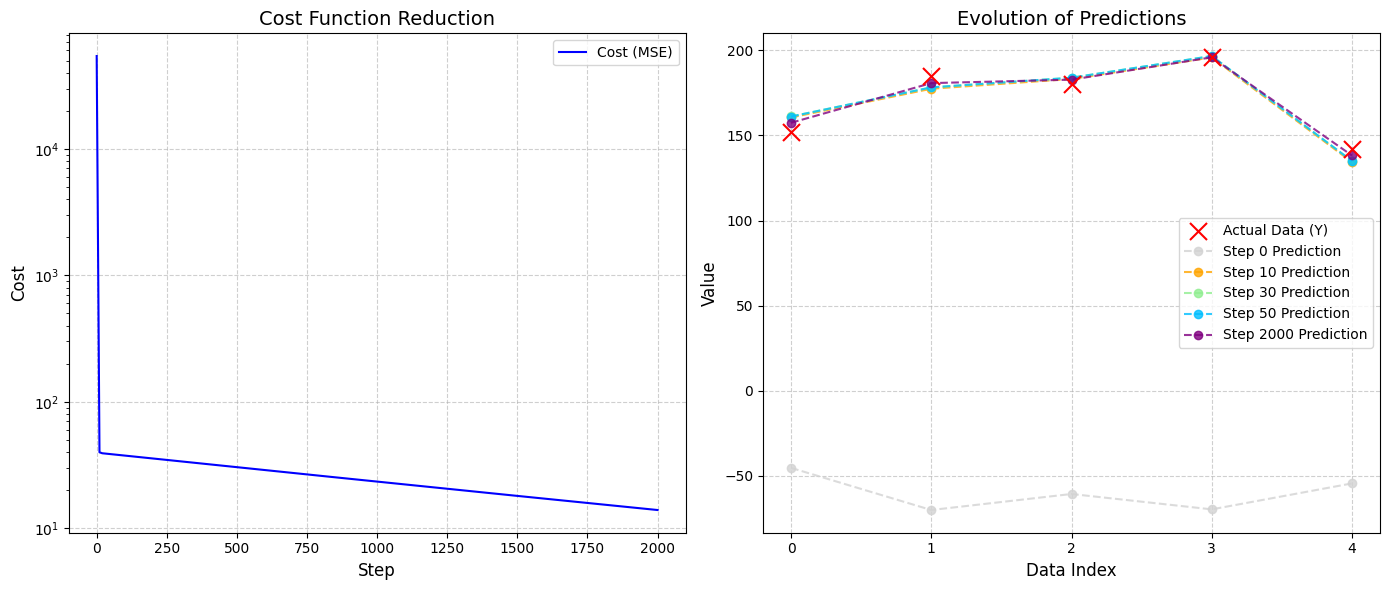

In [3]:
# 시각화를 위한 기록용 리스트
steps_hist = []
cost_hist = []
preds_at_steps = [] # 특정 시점의 예측값을 저장

# -----------------------------
# 1. Data
# -----------------------------
x_data = [
    [73., 80., 75.],
    [93., 88., 93.],
    [89., 91., 90.],
    [96., 98., 100.],
    [73., 66., 70.]
]

y_data = [
    [152.], [185.], [180.], [196.], [142.]
]

# -----------------------------
# 2. Variables (weights and bias)
# -----------------------------
W = tf.Variable(tf.random.normal([3, 1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

# -----------------------------
# 3. Hypothesis
# -----------------------------
def hypothesis(X):
    return tf.matmul(X, W) + b  # Matrix 곱

# -----------------------------
# 4. Loss function (MSE)
# -----------------------------
def cost_fn(hy_val, y_true):
    return tf.reduce_mean(tf.square(hy_val - y_true))

# -----------------------------
# 5. Optimizer
# -----------------------------
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

# -----------------------------
# 6. Training loop
# -----------------------------
for step in range(2001):
  with tf.GradientTape() as tape:
    hy_val = hypothesis(x_data)
    cost_val = cost_fn(hy_val, y_data)

  gradients = tape.gradient(cost_val, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if step % 10 == 0:
    # print(f"{step}, Cost: {cost_val.numpy()}")
    # print("Prediction:", hy_val.numpy())
    steps_hist.append(step)
    cost_hist.append(cost_val.numpy())

  # 특정 단계에서 예측값 저장 (초기, 중기, 후기 변화 확인용)
  if step in [0, 10, 30, 50, 2000]:
    preds_at_steps.append((step, hy_val.numpy()))

# -----------------------------
# 7. Visualization (시각화)
# -----------------------------
plt.figure(figsize=(14, 6))

# 왼쪽 그래프: Cost의 변화 (Learning Curve)
plt.subplot(1, 2, 1)
plt.plot(steps_hist, cost_hist, color='blue', label='Cost (MSE)')
plt.title('Cost Function Reduction', fontsize=14)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.yscale('log') # 초기 오차가 클 경우 로그 스케일로 보면 변화가 더 잘 보입니다
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# 오른쪽 그래프: 실제값 vs 예측값 변화
plt.subplot(1, 2, 2)
data_indices = np.arange(len(y_data)) # 데이터 인덱스 (0, 1, 2, 3, 4)

# 실제 정답 표시 (X 표시)
plt.scatter(data_indices, y_data, color='red', marker='x', s=150, label='Actual Data (Y)', zorder=5)

# 단계별 예측값 표시 (선으로 연결)
colors = ['lightgray', 'orange', 'lightgreen', 'deepskyblue', 'purple']
for i, (step, preds) in enumerate(preds_at_steps):
    plt.plot(data_indices, preds, '--o', label=f'Step {step} Prediction', alpha=0.8, color=colors[i])

plt.title('Evolution of Predictions', fontsize=14)
plt.xlabel('Data Index', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(data_indices)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


(25, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 25
(25, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


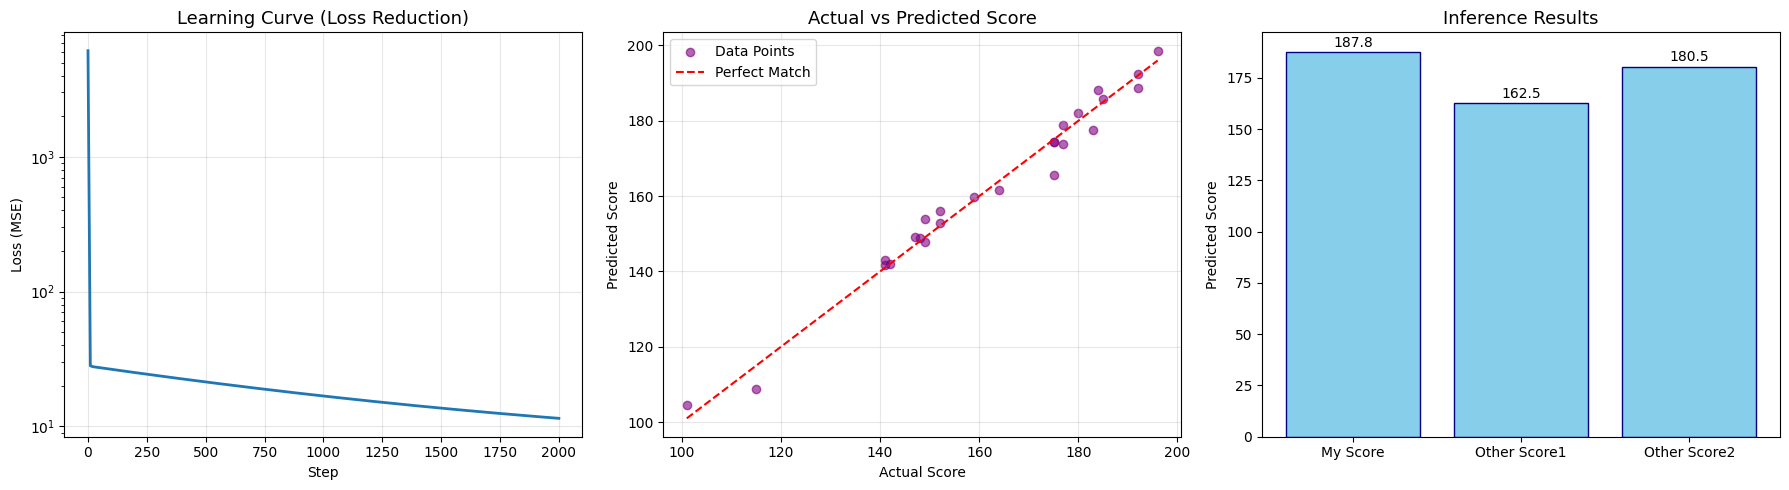


--- Inference Result ---
Prediction for [100, 70, 101]: 187.75224


In [9]:
# 시각화를 위한 기록용 리스트
steps_hist = []
cost_hist = []

# ----------------------------------
# 0. Reproducibility
# ----------------------------------
tf.random.set_seed(777)
np.random.seed(777)

# ----------------------------------
# 1. Load data (CSV)
# ----------------------------------
xy = np.loadtxt(
    '/content/data-01-test-score.csv',
    delimiter=',',
    dtype=np.float32
)

x_data = xy[:, 0:-1]   # shape: (N, 3)
y_data = xy[:, [-1]]   # shape: (N, 1)

print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

# Tensor 변환
x_data = tf.constant(x_data)
y_data = tf.constant(y_data)

# ----------------------------------
# 2. Variables
# ----------------------------------
W = tf.Variable(tf.random.normal([3, 1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

# ----------------------------------
# 3. Hypothesis
# ----------------------------------
def hypothesis(X):
    return tf.matmul(X, W) + b

# ----------------------------------
# 4. Loss function (MSE)
# ----------------------------------
def loss_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# ----------------------------------
# 5. Optimizer
# ----------------------------------
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

# ----------------------------------
# 6. Training loop
# ----------------------------------
for step in range(2001):
    with tf.GradientTape() as tape:
        y_pred = hypothesis(x_data)
        loss = loss_fn(y_pred, y_data)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if step % 10 == 0:
        # print(step, "Cost:", loss.numpy())
        # print("Prediction:\n", y_pred.numpy())
        steps_hist.append(step)
        cost_hist.append(loss.numpy())

# -----------------------------------------------------------
# 7. Visualization (시각화 파트 추가)
# -----------------------------------------------------------
plt.figure(figsize=(18, 5))

# [그래프 1] Learning Curve (Cost)
plt.subplot(1, 3, 1)
plt.plot(steps_hist, cost_hist, color='#1f77b4', linewidth=2)
plt.title('Learning Curve (Loss Reduction)', fontsize=13)
plt.xlabel('Step')
plt.ylabel('Cost (MSE)')
plt.yscale('log')
plt.grid(True, alpha=0.3)

# [그래프 2] Actual vs Prediction (전체 데이터 비교)
plt.subplot(1, 3, 2)
final_preds = hypothesis(x_data).numpy()
plt.scatter(y_data, final_preds, color='purple', alpha=0.6, label='Data Points')
# 완벽한 예측일 때의 기준선 (y=x)
plt.plot([min(y_data), max(y_data)], [min(y_data), max(y_data)], 'r--', label='Perfect Match')
plt.title('Actual vs Predicted Score', fontsize=13)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend()
plt.grid(True, alpha=0.3)

# [그래프 3] Inference Result (새로운 데이터 예측)
plt.subplot(1, 3, 3)
test_inputs = tf.constant([[100., 70., 101.], [60., 70., 110.], [90., 100., 80.]])
test_preds = hypothesis(test_inputs).numpy().flatten()
labels = ['My Score', 'Other Score1', 'Other Score2']

bars = plt.bar(labels, test_preds, color='skyblue', edgecolor='navy')
plt.title('Inference Results', fontsize=13)
plt.ylabel('Predicted Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(float(yval), 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6. Inference Text Output
print("\n--- Inference Result ---")
print("Prediction for [100, 70, 101]:", test_preds[0])

학습을 시작합니다...
Step 0, Loss: 1155.8801
Step 500, Loss: 27.5136
Step 1000, Loss: 19.6778
Step 1500, Loss: 16.0148
Step 2000, Loss: 14.0919


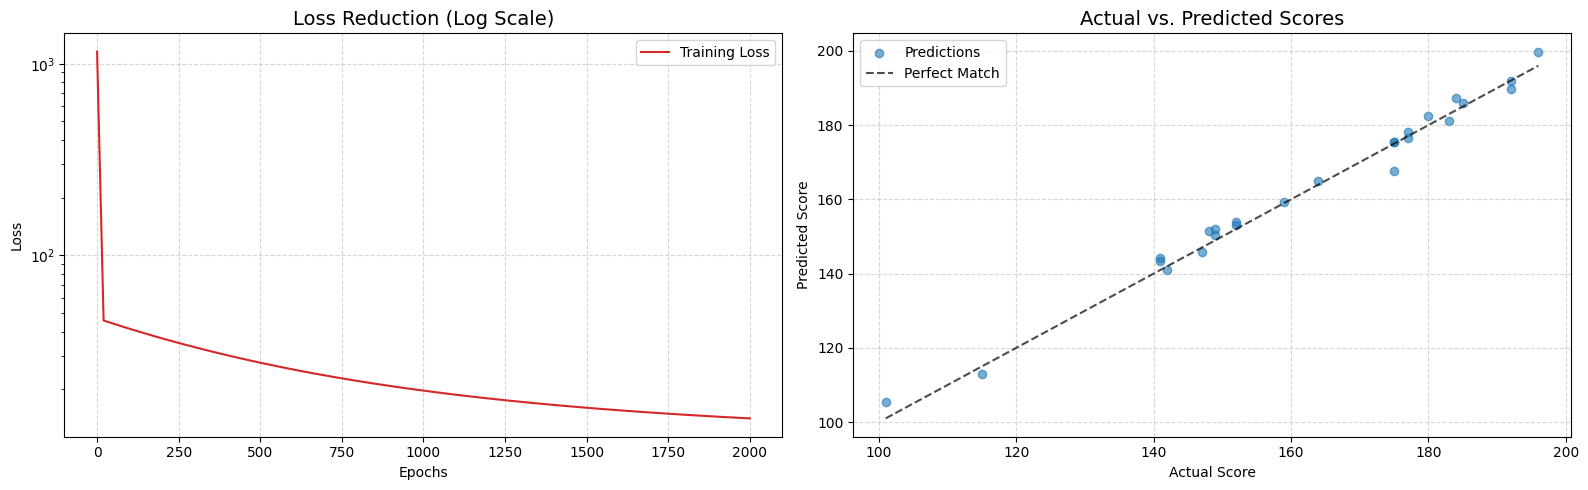


[Test] 100, 70, 101점일 때 예측 점수: 188.95


In [10]:
# ----------------------------------
# 0. Reproducibility
# ----------------------------------
tf.random.set_seed(777)

# ----------------------------------
# 1. CSV Dataset 정의
# ----------------------------------
def parse_csv(line):
    record_defaults = [0.0, 0.0, 0.0, 0.0]
    fields = tf.io.decode_csv(line, record_defaults)
    x = tf.stack(fields[0:3])
    y = tf.reshape(fields[3], [1])
    return x, y

# 파일이 현재 경로에 있어야 합니다.
dataset = (
    tf.data.TextLineDataset("data-01-test-score.csv")
      .map(parse_csv)
      .batch(10)
      .prefetch(tf.data.AUTOTUNE)
)

# ----------------------------------
# 2. Variables & Optimizer
# ----------------------------------
W = tf.Variable(tf.random.normal([3, 1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

# 기록용 리스트
steps_hist = []
loss_hist = []

# ----------------------------------
# 3. Hypothesis & Loss
# ----------------------------------
def hypothesis(X):
    return tf.matmul(X, W) + b

def loss_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# ----------------------------------
# 4. Training loop
# ----------------------------------
print("학습을 시작합니다...")
for step in range(2001):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            y_pred = hypothesis(x_batch)
            loss = loss_fn(y_pred, y_batch)

        gradients = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(gradients, [W, b]))

    if step % 20 == 0:
        steps_hist.append(step)
        loss_hist.append(loss.numpy())

    if step % 500 == 0:
        print(f"Step {step}, Loss: {loss.numpy():.4f}")

# ----------------------------------
# 5. 시각화 (Visualization)
# ----------------------------------
plt.figure(figsize=(16, 5))

# [그래프 1] Loss Curve
plt.subplot(1, 2, 1)
plt.plot(steps_hist, loss_hist, color='tab:red', label='Training Loss')
plt.yscale('log')
plt.title('Loss Reduction (Log Scale)', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# [그래프 2] 전체 데이터 예측 결과 비교
plt.subplot(1, 2, 2)
all_y_true = []
all_y_pred = []

# Dataset을 순회하며 전체 실제값과 예측값 수집
for x_batch, y_batch in dataset:
    preds = hypothesis(x_batch)
    all_y_true.extend(y_batch.numpy().flatten())
    all_y_pred.extend(preds.numpy().flatten())

plt.scatter(all_y_true, all_y_pred, alpha=0.6, color='tab:blue', label='Predictions')
# 대각선 (Perfect Prediction Line)
min_val, max_val = min(all_y_true), max(all_y_true)
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7, label='Perfect Match')

plt.title('Actual vs. Predicted Scores', fontsize=14)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# ----------------------------------
# 6. 간단한 추론 테스트
# ----------------------------------
test_scores = tf.constant([[100., 70., 101.]])
print(f"\n[Test] 100, 70, 101점일 때 예측 점수: {hypothesis(test_scores).numpy()[0][0]:.2f}")